In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Subgroup A Q1

## What are the key factors influencing guest satisfaction throughout their journey?
- Analyse survey responses and operational data to identify the main drivers of satisfaction and dissatisfaction at each touchpoint.
- Propose metrics for tracking guest satisfaction over time.

## Business Context: USS

From a business perspective, USS (Universal Studios Singapore) aims to achieve two main objectives:

1. **Increase Revenue**: Revenue growth for USS is largely driven by factors such as ticket sales, merchandise purchases, food and beverage sales, and the use of services like Express Passes. By improving guest satisfaction at key touchpoints (e.g., attraction experiences, food quality, overall park services), USS can increase customer spending and upsell services.

2. **Increase Footfall**: Another crucial objective is increasing the number of visitors to the park. Satisfied guests are more likely to recommend the park to others, leave positive reviews, and return in the future, all of which can drive higher footfall. Enhancing experiences in areas like food variety, ride satisfaction, and overall park cleanliness can encourage more guests to visit and come back.

### Why These Factors Matter:
- By focusing on **Revenue** and **Footfall**, we align our analysis with USS's core business goals. Tracking guest satisfaction and its impact on these metrics will help USS prioritise improvements in areas that directly influence guest spending and repeat visits.
- Our scoring model reflects these business objectives by calculating scores related to **Revenue** and **Visitor Footfall**, allowing USS to measure how well different aspects of the guest experience align with their goals.


In [36]:
survey_data = pd.read_csv('../data/survey_data_cleaned.csv')

Correlations with Overall Satisfaction:
overall_satisfaction             1.000000
overall_staff_service            0.767905
park_cleanliness                 0.755754
arrival_experience               0.745367
restroom_accessibility           0.707194
merchandise_variety              0.655716
attraction_staff_service         0.606992
attraction_overall_experience    0.590987
food_quality                     0.565628
food_variety                     0.564390
ticket_purchase_ease             0.561644
attraction_wait_time             0.485212
merchandise_price_reasonable     0.442178
food_price_reasonable            0.385191
express_pass_satisfaction        0.307794
Name: overall_satisfaction, dtype: float64


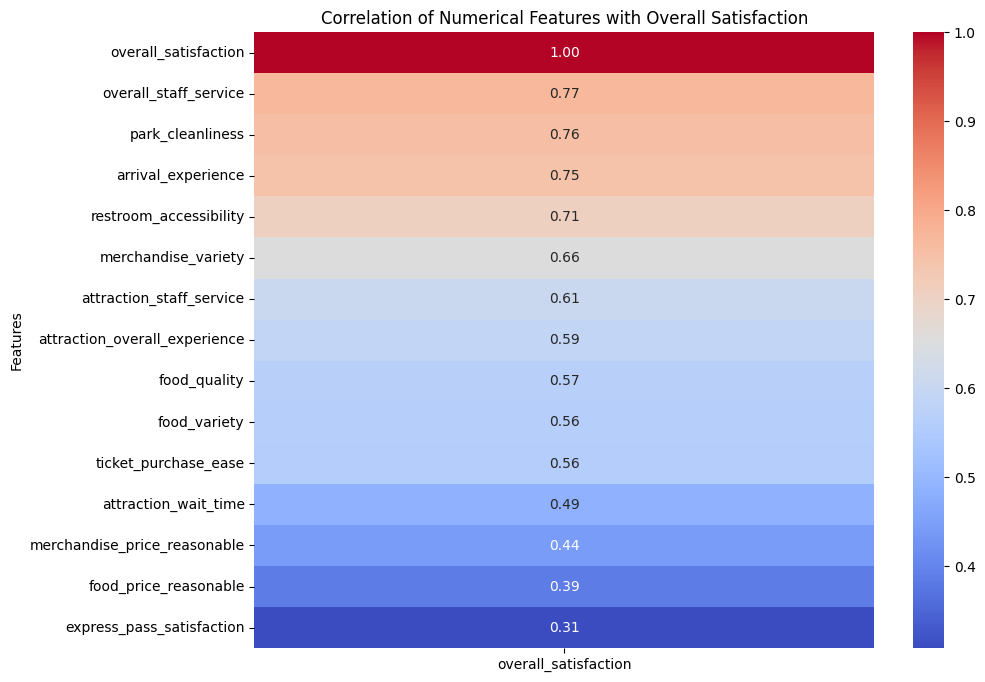

In [11]:
# Select only numerical features
numerical_features = [
    'ticket_purchase_ease', 'arrival_experience', 'attraction_wait_time',
    'express_pass_satisfaction', 'attraction_staff_service',
    'attraction_overall_experience', 'merchandise_price_reasonable',
    'merchandise_variety', 'food_variety', 'food_quality',
    'food_price_reasonable', 'overall_staff_service', 'park_cleanliness',
    'restroom_accessibility', 'overall_satisfaction'
]

# Filter the data for numerical features
numerical_data = survey_data[numerical_features]

# Calculate correlations
correlations = numerical_data.corr()

# Extract correlations with 'overall_satisfaction'
overall_satisfaction_corr = correlations['overall_satisfaction'].sort_values(ascending=False)

# Print the correlation table
print("Correlations with Overall Satisfaction:")
print(overall_satisfaction_corr)

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlations[['overall_satisfaction']].sort_values(by='overall_satisfaction', ascending=False),
    annot=True, cmap='coolwarm', fmt=".2f", cbar=True
)
plt.title("Correlation of Numerical Features with Overall Satisfaction")
plt.xlabel("")
plt.ylabel("Features")
plt.show()

## Key Factors Influencing Guest Satisfaction

Based on the correlation analysis, the following factors were identified as the strongest drivers of guest satisfaction:

### **Top Factors with Strong Correlation (> 0.5)**

1. **Staff Service** (`overall_staff_service`, 0.768):
   - Quality interactions with staff are critical across all guest touchpoints.

2. **Amenities and Facilities**:
   - **Park Cleanliness** (`park_cleanliness`, 0.756): A clean environment significantly impacts guest comfort and enjoyment.
   - **Restroom Accessibility** (`restroom_accessibility`, 0.707): Well-maintained, accessible restrooms are vital for families and older visitors.

3. **Entry Experience**:
   - **Arrival Experience** (`arrival_experience`, 0.745): A welcoming and smooth arrival process sets the tone for the day.
   - **Ticket Purchase Ease** (`ticket_purchase_ease`, 0.562): A simple and efficient ticketing system reduces friction at entry.

4. **Attractions and Rides**:
   - **Attraction Overall Experience** (`attraction_overall_experience`, 0.591): High-quality attractions enhance enjoyment and meet guest expectations.
   - **Attraction Staff Service** (`attraction_staff_service`, 0.607): Staff interactions at attractions boost satisfaction.

5. **Food and Shopping**:
   - **Merchandise Variety** (`merchandise_variety`, 0.656): Guests value diverse and unique shopping options.
   - **Food Quality and Variety** (`food_quality`, 0.566; `food_variety`, 0.564): High-quality and diverse dining options play a key role in guest satisfaction.

---

### **Moderate Correlations (0.3 - 0.5)**
These features have a moderate impact but are less critical drivers:
- **Attraction Wait Time** (`attraction_wait_time`, 0.485): Long wait times slightly detract from satisfaction.
- **Merchandise and Food Pricing** (`merchandise_price_reasonable`, 0.442; `food_price_reasonable`, 0.385): Perceived value for money influences satisfaction.
- **Express Pass Satisfaction** (`express_pass_satisfaction`, 0.308): Premium experiences impact a niche group of guests.

---

### **Conclusion**
The analysis highlights that **staff service, amenities, entry experience, attractions, and food/shopping** are the most significant factors driving guest satisfaction. 

## **Key Touchpoints and Metrics**

| **Touchpoint**               | **Relevant Metrics**                              | **Purpose**                                                                 |
|-------------------------------|--------------------------------------------------|-----------------------------------------------------------------------------|
| **1. Entry Experience**          | `arrival_experience`, `ticket_purchase_ease`     | Understand how smooth and welcoming the entry process is.                  |
| **2. Attractions and Rides**     | `attraction_overall_experience`, `attraction_staff_service`, `attraction_wait_time` | Evaluate guest satisfaction with rides, staff at attractions, and wait times. |
| **3. Amenities and Facilities**  | `park_cleanliness`, `restroom_accessibility`     | Assess comfort and convenience provided by park amenities.                 |
| **4. Food and Shopping**         | `food_quality`, `food_variety`, `merchandise_variety`, `food_price_reasonable`, `merchandise_price_reasonable` | Analyze the impact of food and shopping on guest satisfaction.             |


## Touchpoint 1: Entry Experience Analysis



Correlation with Overall Satisfaction for Entry Experience Metrics:
attraction_overall_experience    0.590987
attraction_staff_service         0.606992
attraction_wait_time             0.485212
Name: overall_satisfaction, dtype: float64

Average Overall Satisfaction for Arrival_experience Groups:
High (Top 25%): 4.16
Low (Bottom 25%): 1.75

Average Overall Satisfaction for Ticket_purchase_ease Groups:
High (Top 25%): 4.06
Low (Bottom 25%): 2.38

Average Overall Satisfaction for Queue_time_at_entry_encoded Groups:
High (Top 25%): 4.21
Low (Bottom 25%): 2.71


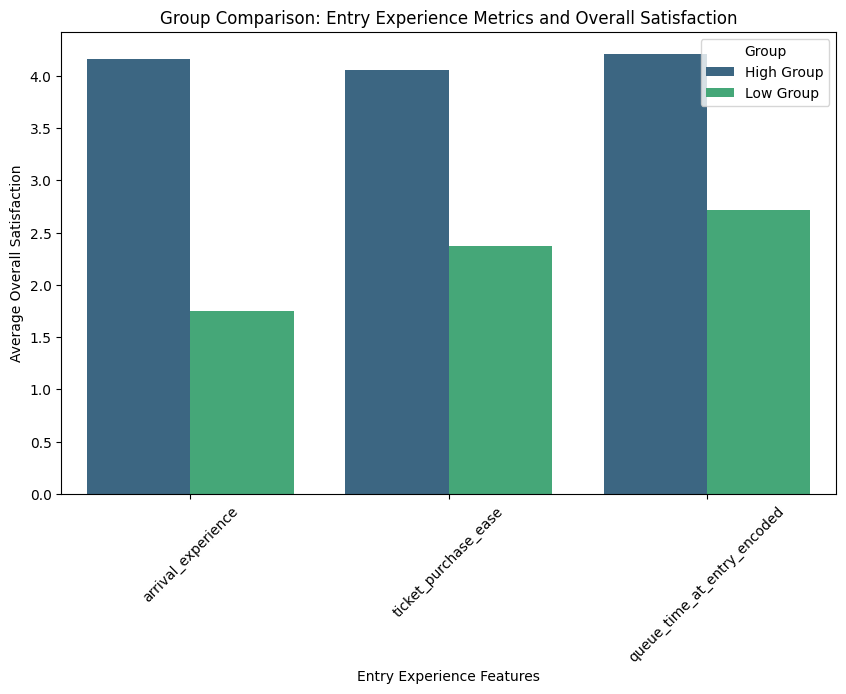

In [30]:
# Encode queue_time_at_entry
queue_time_mapping = {'> 20 mins': 0, '10 - 20 mins': 1, '5 - 10 mins': 2, '< 5 mins': 3}
survey_data['queue_time_at_entry_encoded'] = survey_data['queue_time_at_entry'].map(queue_time_mapping)

# Select relevant features and scale to [0,1]
entry_experience_features = ['arrival_experience', 'ticket_purchase_ease', 'queue_time_at_entry_encoded']
scaler = MinMaxScaler()
survey_data[entry_experience_features] = scaler.fit_transform(survey_data[entry_experience_features])

# Correlation Values
print("Correlation with Overall Satisfaction for Entry Experience Metrics:")
print(correlation_with_satisfaction)

# Group Comparison for Each Feature
group_comparison_data = []
for feature in entry_experience_features:
    high_group = survey_data[survey_data[feature] >= 0.75]  # Top 25%
    low_group = survey_data[survey_data[feature] <= 0.25]  # Bottom 25%
    
    high_avg = high_group['overall_satisfaction'].mean()
    low_avg = low_group['overall_satisfaction'].mean()
    
    group_comparison_data.append({
        'Feature': feature,
        'High Group': high_avg,
        'Low Group': low_avg
    })
    
    # Print Group Comparison
    print(f"\nAverage Overall Satisfaction for {feature.capitalize()} Groups:")
    print(f"High (Top 25%): {high_avg:.2f}")
    print(f"Low (Bottom 25%): {low_avg:.2f}")

# Visualization
group_comparison_df = pd.DataFrame(group_comparison_data)

# Bar Plot for Group Comparison
group_comparison_df_melted = group_comparison_df.melt(id_vars='Feature', 
                                                      value_vars=['High Group', 'Low Group'], 
                                                      var_name='Group', 
                                                      value_name='Overall Satisfaction')

plt.figure(figsize=(10, 6))
sns.barplot(data=group_comparison_df_melted, x='Feature', y='Overall Satisfaction', hue='Group', palette='viridis')
plt.title("Group Comparison: Entry Experience Metrics and Overall Satisfaction")
plt.xlabel("Entry Experience Features")
plt.ylabel("Average Overall Satisfaction")
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.show()

### **Insights: Entry Experience**

- **Correlation Analysis**:  
  Features at the **Entry Experience** touchpoint show varying levels of impact on overall satisfaction:
  - **Arrival Experience**: High correlation of **0.745**, indicating a welcoming and smooth arrival process is critical to guest satisfaction.
  - **Ticket Purchase Ease**: Correlation of **0.562**, highlighting the importance of an efficient ticketing system in reducing entry friction.
  - **Queue Time at Entry**: Moderate correlation of **0.341**, but still a critical feature influencing satisfaction at this touchpoint.

- **Group Comparison**:  
  Guests in the **top 25%** for these features report significantly higher overall satisfaction compared to those in the **bottom 25%**:
  - **Arrival Experience**: Guests in the top group average **4.16** in overall satisfaction, compared to **1.75** in the bottom group — a difference of **137.71%**.
  - **Ticket Purchase Ease**: Guests in the top group average **4.06** in overall satisfaction, compared to **2.38** in the bottom group — a difference of **70.59%**.
  - **Queue Time at Entry**: Guests in the top group average **4.21** in overall satisfaction, compared to **2.71** in the bottom group — a difference of **55.35%**.

- These findings highlight that **Arrival Experience**, **Ticket Purchase Ease**, and **Queue Time at Entry** are key drivers of satisfaction and dissatisfaction at the **Entry Experience** touchpoint, directly shaping guests' first impressions of the park and their overall satisfaction.

## Touchpoint 2: Attractions and Rides Analysis

Correlation with Overall Satisfaction for Attraction Features:
attraction_overall_experience    0.590987
attraction_staff_service         0.606992
attraction_wait_time             0.485212
Name: overall_satisfaction, dtype: float64

Average Overall Satisfaction for Attraction_overall_experience Groups:
High (Top 25%): 4.08
Low (Bottom 25%): 2.50

Average Overall Satisfaction for Attraction_staff_service Groups:
High (Top 25%): 4.12
Low (Bottom 25%): 2.33

Average Overall Satisfaction for Attraction_wait_time Groups:
High (Top 25%): 4.13
Low (Bottom 25%): 3.30


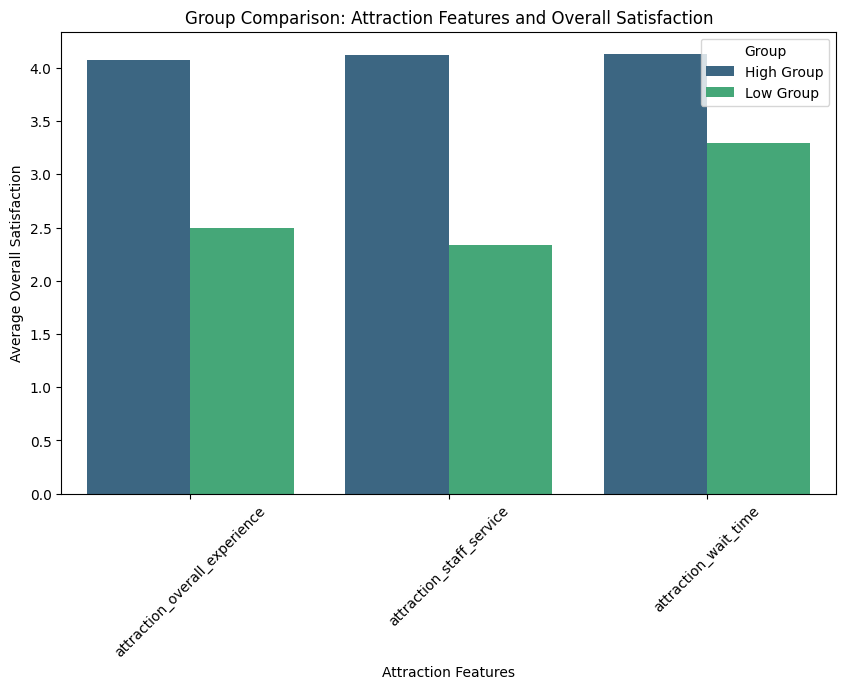

In [31]:
# Select relevant features for Attractions and Rides analysis
attraction_features = [
    'attraction_overall_experience',
    'attraction_staff_service',
    'attraction_wait_time'
]

# Scale all features to [0,1]
scaler = MinMaxScaler()
survey_data[attraction_features] = scaler.fit_transform(survey_data[attraction_features])

# Compute correlations with overall satisfaction
correlation_with_satisfaction = survey_data[attraction_features + ['overall_satisfaction']].corr()['overall_satisfaction'].drop('overall_satisfaction')
print("Correlation with Overall Satisfaction for Attraction Features:")
print(correlation_with_satisfaction)

# Group Comparison for Each Feature
group_comparison_data = []
for feature in attraction_features:
    high_group = survey_data[survey_data[feature] >= 0.75]  # Top 25%
    low_group = survey_data[survey_data[feature] <= 0.25]  # Bottom 25%
    
    high_avg = high_group['overall_satisfaction'].mean()
    low_avg = low_group['overall_satisfaction'].mean()
    
    group_comparison_data.append({
        'Feature': feature,
        'High Group': high_avg,
        'Low Group': low_avg
    })
    
    # Print Group Comparison
    print(f"\nAverage Overall Satisfaction for {feature.capitalize()} Groups:")
    print(f"High (Top 25%): {high_avg:.2f}")
    print(f"Low (Bottom 25%): {low_avg:.2f}")

# Visualization: Group Comparison for Attractions and Rides
group_comparison_df = pd.DataFrame(group_comparison_data)

# Bar Plot for Group Comparison
group_comparison_df_melted = group_comparison_df.melt(id_vars='Feature', 
                                                      value_vars=['High Group', 'Low Group'], 
                                                      var_name='Group', 
                                                      value_name='Overall Satisfaction')

plt.figure(figsize=(10, 6))
sns.barplot(data=group_comparison_df_melted, x='Feature', y='Overall Satisfaction', hue='Group', palette='viridis')
plt.title("Group Comparison: Attraction Features and Overall Satisfaction")
plt.xlabel("Attraction Features")
plt.ylabel("Average Overall Satisfaction")
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.show()

### **Insights: Attractions and Rides**

- **Correlation Analysis**:  
  Features related to attractions show varying levels of correlation with overall satisfaction:
  - **Attraction Staff Service**: Correlation of **0.607**, indicating a significant influence on guest satisfaction through positive staff interactions.
  - **Attraction Overall Experience**: Correlation of **0.591**, emphasizing the importance of high-quality attractions in meeting guest expectations.
  - **Attraction Wait Time**: Correlation of **0.485**, reflecting a moderate but notable impact on satisfaction, with shorter wait times improving the overall experience.

- **Group Comparison**:  
  Guests in the **top 25%** for these features report significantly higher overall satisfaction compared to those in the **bottom 25%**:
  - **Attraction Staff Service**: Guests in the top group average **4.12** in overall satisfaction, compared to **2.33** in the bottom group — a difference of **76.9%**.
  - **Attraction Overall Experience**: Guests in the top group average **4.08** in overall satisfaction, compared to **2.50** in the bottom group — a difference of **63.2%**.
  - **Attraction Wait Time**: Guests in the top group average **4.13** in overall satisfaction, compared to **3.30** in the bottom group — a difference of **25.2%**.

- These findings demonstrate that **Attraction Staff Service** and **Attraction Overall Experience** are the key drivers of guest satisfaction at the **Attractions and Rides** touchpoint. While **Attraction Wait Time** has a more moderate impact, it remains an important consideration for improving the overall guest experience.

## Touchpoint 3: Amenities and Facilities

Correlation with Overall Satisfaction for Amenities Features:
park_cleanliness          0.755754
restroom_accessibility    0.707194
Name: overall_satisfaction, dtype: float64

Average Overall Satisfaction for Park_cleanliness Groups:
High (Top 25%): 4.19
Low (Bottom 25%): 2.20

Average Overall Satisfaction for Restroom_accessibility Groups:
High (Top 25%): 4.15
Low (Bottom 25%): 2.20


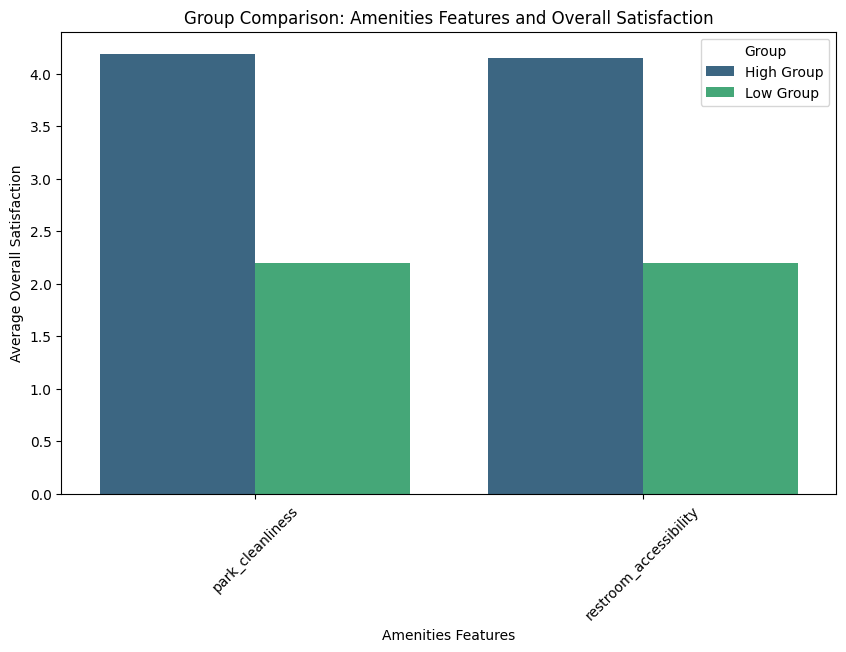

In [34]:
# Select relevant features for Amenities and Facilities
amenities_features = ['park_cleanliness', 'restroom_accessibility']

# Step 1: Scale the features to [0,1]
scaler = MinMaxScaler()
survey_data[amenities_features] = scaler.fit_transform(survey_data[amenities_features])

# Step 2: Correlation Analysis
correlation_with_satisfaction = survey_data[amenities_features + ['overall_satisfaction']].corr()['overall_satisfaction'].drop('overall_satisfaction')
print("Correlation with Overall Satisfaction for Amenities Features:")
print(correlation_with_satisfaction)

# Step 3: Group Comparison for Each Feature
group_comparison_data = []
for feature in amenities_features:
    high_group = survey_data[survey_data[feature] >= 0.75]  # Top 25%
    low_group = survey_data[survey_data[feature] <= 0.25]  # Bottom 25%
    
    high_avg = high_group['overall_satisfaction'].mean()
    low_avg = low_group['overall_satisfaction'].mean()
    
    group_comparison_data.append({
        'Feature': feature,
        'High Group': high_avg,
        'Low Group': low_avg
    })
    
    # Print Group Comparison
    print(f"\nAverage Overall Satisfaction for {feature.capitalize()} Groups:")
    print(f"High (Top 25%): {high_avg:.2f}")
    print(f"Low (Bottom 25%): {low_avg:.2f}")

# Step 4: Visualization
group_comparison_df = pd.DataFrame(group_comparison_data)

# Melt the DataFrame for easier plotting
group_comparison_df_melted = group_comparison_df.melt(id_vars='Feature', 
                                                      value_vars=['High Group', 'Low Group'], 
                                                      var_name='Group', 
                                                      value_name='Overall Satisfaction')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=group_comparison_df_melted, x='Feature', y='Overall Satisfaction', hue='Group', palette='viridis')
plt.title("Group Comparison: Amenities Features and Overall Satisfaction")
plt.xlabel("Amenities Features")
plt.ylabel("Average Overall Satisfaction")
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.show()


### **Insights: Amenities and Facilities**

- **Correlation Analysis**:  
  Both amenities features show a strong correlation with overall satisfaction, emphasizing their importance in shaping guest experiences at Universal Studios Singapore:
  - **Park Cleanliness**: Correlation of **0.756**, indicating a significant impact on overall satisfaction.
  - **Restroom Accessibility**: Correlation of **0.707**, highlighting the importance of easily accessible and well-maintained restroom facilities.

- **Group Comparison**:  
  Guests in the **top 25%** for these features report substantially higher overall satisfaction compared to those in the **bottom 25%**:
  - **Park Cleanliness**: Guests in the top group average **4.19** in overall satisfaction, compared to **2.20** in the bottom group — a difference of **90.45%**.
  - **Restroom Accessibility**: Guests in the top group average **4.15** in overall satisfaction, compared to **2.20** in the bottom group — a difference of **88.64%**.

- These findings highlight that **Park Cleanliness** and **Restroom Accessibility** are critical drivers of guest satisfaction at the **Amenities and Facilities** touchpoint. High-quality amenities significantly enhance guest experience and overall satisfaction.

## Touchpoint 4: Food and Shopping

Correlation with Overall Satisfaction for Food and Shopping Features:
merchandise_variety             0.655716
food_quality                    0.565628
food_variety                    0.564390
merchandise_price_reasonable    0.442178
food_price_reasonable           0.385191
dtype: float64

Average Overall Satisfaction for Food_quality Groups:
High (Top 25%): 4.25
Low (Bottom 25%): 2.94

Average Overall Satisfaction for Food_variety Groups:
High (Top 25%): 4.33
Low (Bottom 25%): 3.22

Average Overall Satisfaction for Merchandise_variety Groups:
High (Top 25%): 4.15
Low (Bottom 25%): 2.22

Average Overall Satisfaction for Food_price_reasonable Groups:
High (Top 25%): 4.67
Low (Bottom 25%): 3.66

Average Overall Satisfaction for Merchandise_price_reasonable Groups:
High (Top 25%): 4.25
Low (Bottom 25%): 3.37


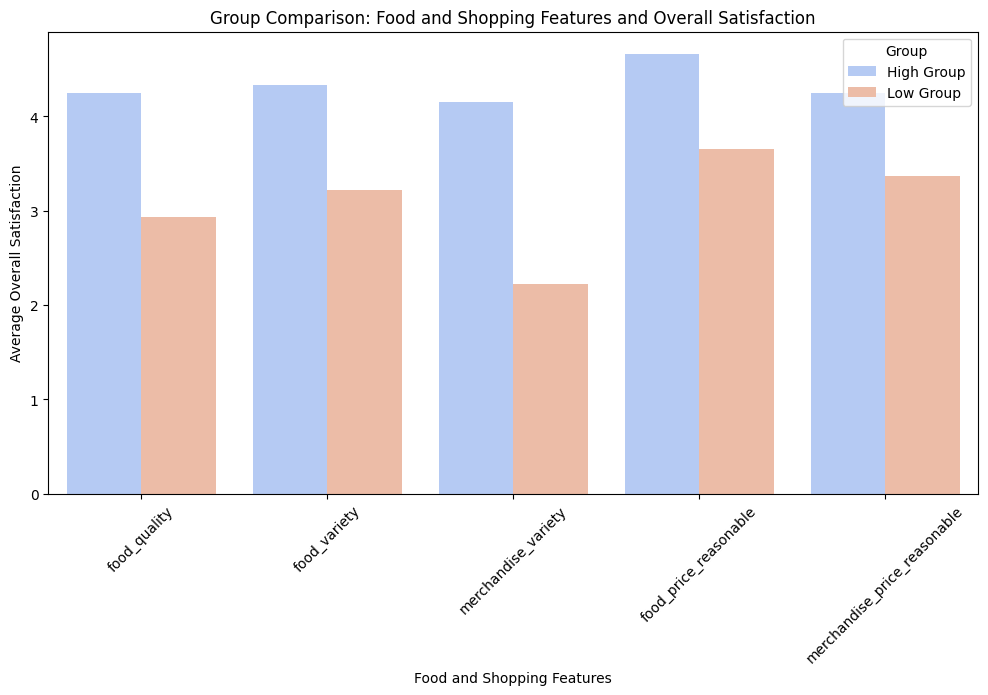

In [35]:
# Step 1: Select relevant features
food_shopping_features = [
    'food_quality', 
    'food_variety', 
    'merchandise_variety', 
    'food_price_reasonable', 
    'merchandise_price_reasonable'
]

# Step 2: Scale features to [0,1]
scaler = MinMaxScaler()
survey_data[food_shopping_features] = scaler.fit_transform(survey_data[food_shopping_features])

# Step 3: Correlation Analysis
correlation_with_satisfaction = survey_data[food_shopping_features].corrwith(survey_data['overall_satisfaction']).sort_values(ascending=False)
print("Correlation with Overall Satisfaction for Food and Shopping Features:")
print(correlation_with_satisfaction)

# Step 4: Group Comparison for Each Feature
group_comparison_data = []
for feature in food_shopping_features:
    high_group = survey_data[survey_data[feature] >= 0.75]  # Top 25%
    low_group = survey_data[survey_data[feature] <= 0.25]  # Bottom 25%
    
    high_avg = high_group['overall_satisfaction'].mean()
    low_avg = low_group['overall_satisfaction'].mean()
    
    group_comparison_data.append({
        'Feature': feature,
        'High Group': high_avg,
        'Low Group': low_avg
    })
    
    # Print Group Comparison
    print(f"\nAverage Overall Satisfaction for {feature.capitalize()} Groups:")
    print(f"High (Top 25%): {high_avg:.2f}")
    print(f"Low (Bottom 25%): {low_avg:.2f}")

# Visualization
group_comparison_df = pd.DataFrame(group_comparison_data)

# Bar Plot for Group Comparison
group_comparison_df_melted = group_comparison_df.melt(id_vars='Feature', 
                                                      value_vars=['High Group', 'Low Group'], 
                                                      var_name='Group', 
                                                      value_name='Overall Satisfaction')

plt.figure(figsize=(12, 6))
sns.barplot(data=group_comparison_df_melted, x='Feature', y='Overall Satisfaction', hue='Group', palette='coolwarm')
plt.title("Group Comparison: Food and Shopping Features and Overall Satisfaction")
plt.xlabel("Food and Shopping Features")
plt.ylabel("Average Overall Satisfaction")
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.show()


### **Insights: Food and Shopping**

- **Merchandise Variety** (**0.656**), **Food Quality** (**0.566**), and **Food Variety** (**0.564**) show strong correlations with overall satisfaction, identifying them as primary drivers at the **Food and Shopping** touchpoint.
- While **Food Price Reasonable** and **Merchandise Price Reasonable** have moderate correlations (**0.385** and **0.442**, respectively), they remain important features influencing guest satisfaction.

- Guests in the **top 25%** for these food and shopping features report significantly higher overall satisfaction compared to those in the **bottom 25%**:
  - **Food Quality**: Overall satisfaction averages **4.25** for the top group versus **2.94** for the bottom group, a difference of **44.56%**.
  - **Food Variety**: Overall satisfaction averages **4.33** for the top group versus **3.22** for the bottom group, a difference of **34.47%**.
  - **Merchandise Variety**: Overall satisfaction averages **4.15** for the top group versus **2.22** for the bottom group, a difference of **86.94%**.
  - **Food Price Reasonable**: Overall satisfaction averages **4.67** for the top group versus **3.66** for the bottom group, a difference of **27.60%**.
  - **Merchandise Price Reasonable**: Overall satisfaction averages **4.25** for the top group versus **3.37** for the bottom group, a difference of **26.15%**.

- These significant differences highlight that **Merchandise Variety**, **Food Quality**, and **Food Variety** are the primary drivers of satisfaction at this touchpoint, while reasonable pricing for food and merchandise also moderately impacts overall guest satisfaction.

### **Staff Service as a Universal Driver**

Correlation with Overall Satisfaction:
Overall Staff Service: 0.768

Correlation of Overall Staff Service with Touchpoint Features:
overall_staff_service            1.000000
arrival_experience               0.635205
attraction_overall_experience    0.461850
park_cleanliness                 0.647216
food_quality                     0.581487
Name: overall_staff_service, dtype: float64
High Group Satisfaction: 4.14
Low Group Satisfaction: 1.86
Difference: 122.78%


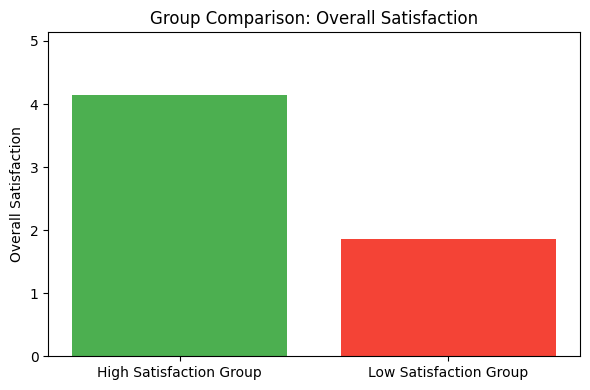

In [53]:
# Select relevant features for analysis
touchpoint_features = [
    'overall_staff_service', 
    'arrival_experience', 
    'attraction_overall_experience', 
    'park_cleanliness', 
    'food_quality'
]

# Calculate correlations with overall_staff_service
staff_service_corr = survey_data[touchpoint_features].corr()

# Display correlation values with overall_satisfaction
print("Correlation with Overall Satisfaction:")
print(f"Overall Staff Service: {survey_data['overall_staff_service'].corr(survey_data['overall_satisfaction']):.3f}")

print("\nCorrelation of Overall Staff Service with Touchpoint Features:")
print(staff_service_corr['overall_staff_service'])

# Adjust thresholds based on data distribution
low_group = survey_data[survey_data['overall_staff_service'] <= 2.0]  # Bottom quartile
high_group = survey_data[survey_data['overall_staff_service'] >= 4.0]  # Top quartile

# Calculate averages for each group
if low_group.empty or high_group.empty:
    print("Insufficient data for one of the groups.")
else:
    high_satisfaction = high_group['overall_satisfaction'].mean()
    low_satisfaction = low_group['overall_satisfaction'].mean()
    difference = ((high_satisfaction - low_satisfaction) / low_satisfaction) * 100

    print(f"High Group Satisfaction: {high_satisfaction:.2f}")
    print(f"Low Group Satisfaction: {low_satisfaction:.2f}")
    print(f"Difference: {difference:.2f}%")

# Visualization
# Data for the groups
group_data = ["High Satisfaction Group", "Low Satisfaction Group"]
satisfaction_scores = [high_satisfaction, low_satisfaction]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(group_data, satisfaction_scores, color=['#4caf50', '#f44336'])
plt.title("Group Comparison: Overall Satisfaction")
plt.ylabel("Overall Satisfaction")
plt.ylim(0, max(satisfaction_scores) + 1)

plt.tight_layout()
plt.show()

### **Insights**:
- **Correlation Analysis**:  
  - Staff service demonstrates a strong correlation with overall satisfaction (**0.768**), highlighting its significance as a key driver of guest satisfaction.  
  - Significant correlations with features across various touchpoints emphasize its universal influence:
    - **Arrival Experience**: Correlation of **0.635**, showing the role of staff interactions in setting the tone for a positive park experience.
    - **Attraction Overall Experience**: Correlation of **0.462**, reflecting the contribution of staff service to enhancing guest enjoyment of attractions.
    - **Park Cleanliness**: Correlation of **0.647**, underscoring the impact of staff efforts in maintaining a clean and inviting environment.
    - **Food Quality**: Correlation of **0.581**, indicating that staff interactions play a role in shaping perceptions of dining experiences.

- **Group Comparison**:  
  - Guests in the **top quartile** for staff service (scores **≥ 4.0**) report an average overall satisfaction of **4.14**.  
  - Guests in the **bottom quartile** (scores **≤ 2.0**) report an average overall satisfaction of **1.86**, a difference of **122.78%**.  
  - This stark difference highlights the critical role of staff service in shaping guest satisfaction, irrespective of the touchpoint.

- **Conclusion**:  
  Staff service is a universal driver of satisfaction, influencing guest experiences across all major touchpoints. Its strong correlation with key features and significant group differences in satisfaction underscore its importance in delivering a consistently positive guest experience.


### **Final Summary: Key Drivers of Satisfaction and Dissatisfaction at Each Touchpoint**

- **1. Entry Experience**:  
  At the entry experience touchpoint, features like guests’ **ratings of their arrival experience**, **ease of purchasing tickets**, and **queue time at the entrance** are the primary drivers of satisfaction and dissatisfaction. A smooth and welcoming arrival process, efficient ticketing, and minimal wait times play a critical role in shaping guests’ first impressions of Universal Studios Singapore and their overall satisfaction with the park.

- **2. Attractions and Rides**:  
  For attractions and rides, satisfaction is heavily influenced by guests’ **ratings of attraction staff service** and their **overall experience of the rides and attractions**. Positive interactions with staff and high-quality attractions significantly enhance guest enjoyment. While shorter wait times for attractions moderately affect satisfaction, they remain an essential factor in improving the guest experience.

- **3. Amenities and Facilities**:  
  At the amenities and facilities touchpoint, features like **ratings of park cleanliness** and **accessibility of restrooms** are key satisfaction drivers. High-quality amenities, such as clean and well-maintained facilities, significantly improve guest experiences and contribute to their overall satisfaction.

- **4. Food and Shopping**:  
  In the food and shopping category, features such as **ratings of merchandise variety**, **food quality**, and **variety of food options** stand out as the primary drivers of satisfaction. Guests’ perceptions of reasonable pricing for food and merchandise also play a moderate role in influencing their overall satisfaction. These factors highlight the importance of diverse and high-quality offerings that meet guests’ expectations in this touchpoint.

- **5. Staff Service Across Touchpoints**:  
  Staff service is a critical driver of satisfaction across all touchpoints. Guests’ interactions with staff—whether during entry, at attractions, or in dining and retail areas—consistently correlate with higher overall satisfaction. Ensuring friendly, efficient, and helpful staff interactions is essential to creating a positive and memorable experience throughout the park.


## **Proposed Metrics for Tracking Guest Satisfaction Over Time**

To achieve Universal Studios Singapore's business objectives of increasing revenue and footfall, we propose tracking the following metrics, categorized by touchpoints and aligned with insights from the analysis:

| **Touchpoint**           | **Metric**                                  | **Description**                                                                                     | **Business Objective Alignment**                                                                 |
|---------------------------|---------------------------------------------|-----------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Entry Experience**      | Arrival Experience Index                   | Tracks guest ratings of the smoothness and warmth of the arrival process.                          | Enhances first impressions, encouraging repeat visits and positive reviews.                     |
|                           | Ticketing Efficiency Score                 | Monitors satisfaction with the ease of ticket purchasing.                                           | Identifies friction points and optimizes upselling opportunities, like Express Pass sales.       |
|                           | Queue Management Index                     | Measures average queue times at the entrance relative to capacity.                                 | Improves operational efficiency and guest satisfaction at entry.                                 |
| **Attractions and Rides** | Attraction Quality Score                   | Aggregates guest ratings of ride quality.                                                          | Ensures attractions meet guest expectations, boosting loyalty and satisfaction.                  |
|                           | Staff Interaction Score                    | Tracks satisfaction with attraction staff interactions.                                             | Positive interactions improve satisfaction and likelihood of return visits.                      |
|                           | Ride Wait Time Index                       | Monitors average wait times for attractions.                                                       | Identifies opportunities for queue optimization and promotes Express Pass upselling.             |
| **Amenities and Facilities** | Facility Cleanliness Index                | Measures guest satisfaction with cleanliness of restrooms and common areas.                        | Clean facilities encourage longer stays and improved satisfaction.                               |
|                           | Facility Accessibility Score               | Tracks satisfaction with restroom and seating availability during peak times.                      | Enhances comfort and prolongs guest visits, driving higher in-park spending.                     |
| **Food and Shopping**     | Food and Beverage Quality Index            | Aggregates guest ratings of food quality and variety.                                               | High-quality offerings drive food sales and overall satisfaction.                                |
|                           | Merchandise Variety and Pricing Index      | Combines guest ratings of merchandise variety and pricing reasonableness.                          | Ensures retail offerings meet expectations, maximizing merchandise sales.                        |
|                           | Spending-to-Satisfaction Ratio             | Tracks guest spending relative to satisfaction levels.                                              | Optimizes pricing and product mix to drive higher revenue.                                       |
| **Cross-Touchpoint**      | Overall Staff Service Score                | Measures satisfaction with staff interactions across all touchpoints.                              | Highlights the critical role of staff in shaping the overall guest experience.                   |
|                           | Net Promoter Score (NPS)                   | Tracks likelihood of guests recommending the park based on their overall experience.                | Drives word-of-mouth marketing and increases footfall.                                           |
|                           | Return Likelihood Index                    | Monitors trends in guest-reported likelihood of returning, segmented by demographics and ticket types. | Identifies opportunities for targeted improvements to boost loyalty and repeat visits.           |

---

### **Implementation Recommendations**
1. **Data Collection**:
   - Deploy surveys and feedback kiosks throughout the park to gather real-time satisfaction data for each metric.
   - Integrate operational data (e.g., queue times, attendance) to contextualize guest feedback and identify actionable insights.

2. **Benchmarking**:
   - Establish baseline metrics for each touchpoint and monitor trends to assess the effectiveness of improvement initiatives.

3. **Integration**:
   - Combine survey and operational data with demographic segmentation to tailor improvements to guest needs, maximizing satisfaction, revenue, and footfall.